In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline


In [2]:
df=pd.read_csv('D:\Lockdown days\Coursera\Machine learning with python\FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
 fd=df.drop(df.columns[[0,1,2,3,6,7,11]],axis=1)

In [11]:
fd.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [12]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
ENGINESIZE              1067 non-null float64
CYLINDERS               1067 non-null int64
FUELCONSUMPTION_CITY    1067 non-null float64
FUELCONSUMPTION_HWY     1067 non-null float64
FUELCONSUMPTION_COMB    1067 non-null float64
CO2EMISSIONS            1067 non-null int64
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


In [13]:
fd.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [14]:
splt=np.random.rand(len(fd))<0.8
train=fd[splt]
test=fd[~splt]

In [17]:
train.shape

(859, 6)

In [19]:
test.shape

(208, 6)

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
x=np.asanyarray(train[['ENGINESIZE']])
y=np.asanyarray(train[['CO2EMISSIONS']])
X=np.asanyarray(test[['ENGINESIZE']])
Y=np.asanyarray(test[['CO2EMISSIONS']])

#double bracket na dile pore reg line draw te jhamela hoy

In [41]:
from sklearn.preprocessing import PolynomialFeatures

feature chilo ekta x,oi ekta theke ekhon aro koyekta hobe polynomialfeature er maddhome

In [42]:
poly=PolynomialFeatures(degree=2)

In [43]:
x_poly=poly.fit_transform(x)  #x feature ta numpy array and 2d array[[]]

In [44]:
x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [45]:
reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[ 0.         52.42770625 -1.74541496]]
Intercept:  [104.03225451]


Text(0, 0.5, 'Emission')

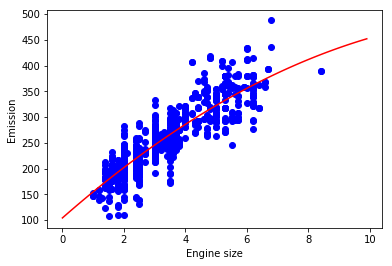

In [57]:
plt.scatter(x,y,  color='blue')
XX = np.arange(0.0, 10.0,0.1)
yy = reg.intercept_[0]+ reg.coef_[0][1]*XX+ reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evaluation

In [50]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X)
Y_predicted = reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_predicted - Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_predicted - Y) ** 2))
print("R2-score: %.2f" % r2_score(Y_predicted , Y) )

Mean absolute error: 24.54
Residual sum of squares (MSE): 1013.09
R2-score: 0.68


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

Coefficients:  [[ 0.         29.96570482  4.40912955 -0.50737016]]
Intercept:  [128.00111479]
Mean absolute error: 24.56
Residual sum of squares (MSE): 1012.66
R2-score: 0.68


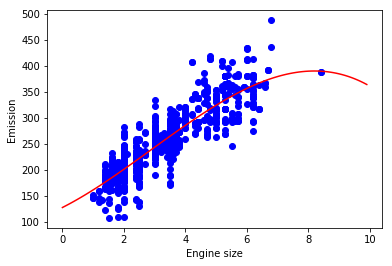

In [56]:
from sklearn import linear_model
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(X)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , Y) )